In [2]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import load_data_excel, convert_numeric_columns
from src.visu import (
    plot_acp_3d, plot_variance_explained, plot_correlation_matrix,
    plot_correlation_circle, plot_distribution
)
from skrub import TableReport

# Load data
data = load_data_excel('../data/sources/Donnees_IA_2025.xlsx')

# Define variables
vars_expl = [
    "MS % brut", "PB % brut", "CB % brut", "MGR % brut", "MM % brut",
    "NDF % brut", "ADF % brut", "Lignine % brut", "Amidon % brut", "Sucres % brut"
]

vars_cibles = [
    "EB (kcal) kcal/kg brut", "ED porc croissance (kcal) kcal/kg brut", 
    "EM porc croissance (kcal) kcal/kg brut", "EN porc croissance (kcal) kcal/kg brut",
    "EMAn coq (kcal) kcal/kg brut", "EMAn poulet (kcal) kcal/kg brut",
    "UFL 2018 par kg brut", "UFV 2018 par kg brut", "PDIA 2018 g/kg brut", 
    "PDI 2018 g/kg brut", "BalProRu 2018 g/kg brut"
]

# Convert numeric columns
data = convert_numeric_columns(data, vars_expl + vars_cibles)

# Simplified names for display
simplified_names = {
    "MS % brut": "MS", "PB % brut": "PB", "CB % brut": "CB", "MGR % brut": "MGR",
    "MM % brut": "MM", "NDF % brut": "NDF", "ADF % brut": "ADF", "Lignine % brut": "Lignine",
    "Amidon % brut": "Amidon", "Sucres % brut": "Sucres", "EB (kcal) kcal/kg brut": "EB",
    "ED porc croissance (kcal) kcal/kg brut": "ED porc", "EM porc croissance (kcal) kcal/kg brut": "EM porc",
    "EN porc croissance (kcal) kcal/kg brut": "EN porc", "EMAn coq (kcal) kcal/kg brut": "EMAn coq",
    "EMAn poulet (kcal) kcal/kg brut": "EMAn poulet", "UFL 2018 par kg brut": "UFL",
    "UFV 2018 par kg brut": "UFV", "PDIA 2018 g/kg brut": "PDIA", "PDI 2018 g/kg brut": "PDI",
    "BalProRu 2018 g/kg brut": "BalProRu"
}

print(f" Data loaded: {len(data)} observations, {len(data.columns)} columns")

 Data loaded: 6376 observations, 29 columns


# Exploratory Data Analysis - Composition Chimique & Cibles Énergétiques

Comprehensive analysis of the nutritional composition data and energy targets.

In [5]:
report = TableReport(data)
report

Processing column  29 / 29


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [7]:
# Data Overview
print("=" * 80)
print("DATA OVERVIEW")
print("=" * 80)
print(f"\nClasses (Classe): {data['Classe'].nunique()} unique values")
print(f"Product names (Nom): {data['Nom'].nunique()} unique values")

# Classes and products breakdown
print("\n" + "=" * 80)
print("DATA STRUCTURE")
print("=" * 80)
noms_par_classe = data.groupby('Classe')['Nom'].nunique().reset_index()
noms_par_classe.columns = ['Classe', 'Nb Products']
print("\nProducts per Class:")
print(noms_par_classe.to_string(index=False))

obs_par_nom = data['Nom'].value_counts().reset_index()
obs_par_nom.columns = ['Nom', 'Observations']
print(f"\nObservations per Product (top 15):")
print(obs_par_nom.head(15).to_string(index=False))

DATA OVERVIEW

Classes (Classe): 15 unique values
Product names (Nom): 73 unique values

DATA STRUCTURE

Products per Class:
                                Classe  Nb Products
         Amidon, racines et tubercules            3
        Autres coproduits des céréales            4
              Autres produits végétaux            5
       Coproduits d'animaux terrestres            2
       Coproduits de fruits et légumes            2
                     Coproduits du blé            6
                    Coproduits du maïs            9
                     Coproduits du riz            3
                              Céréales            8
        Farines et solubles de poisson            1
                 Fourrages déshydratés            2
Graines protéagineuses et oléagineuses            9
                  Mélasses et vinasses            2
                     Produits laitiers            3
                Tourteaux d'oléagineux           14

Observations per Product (top 15):
       

## Part 1: Distribution Analysis


Displaying distributions for explanatory variables...


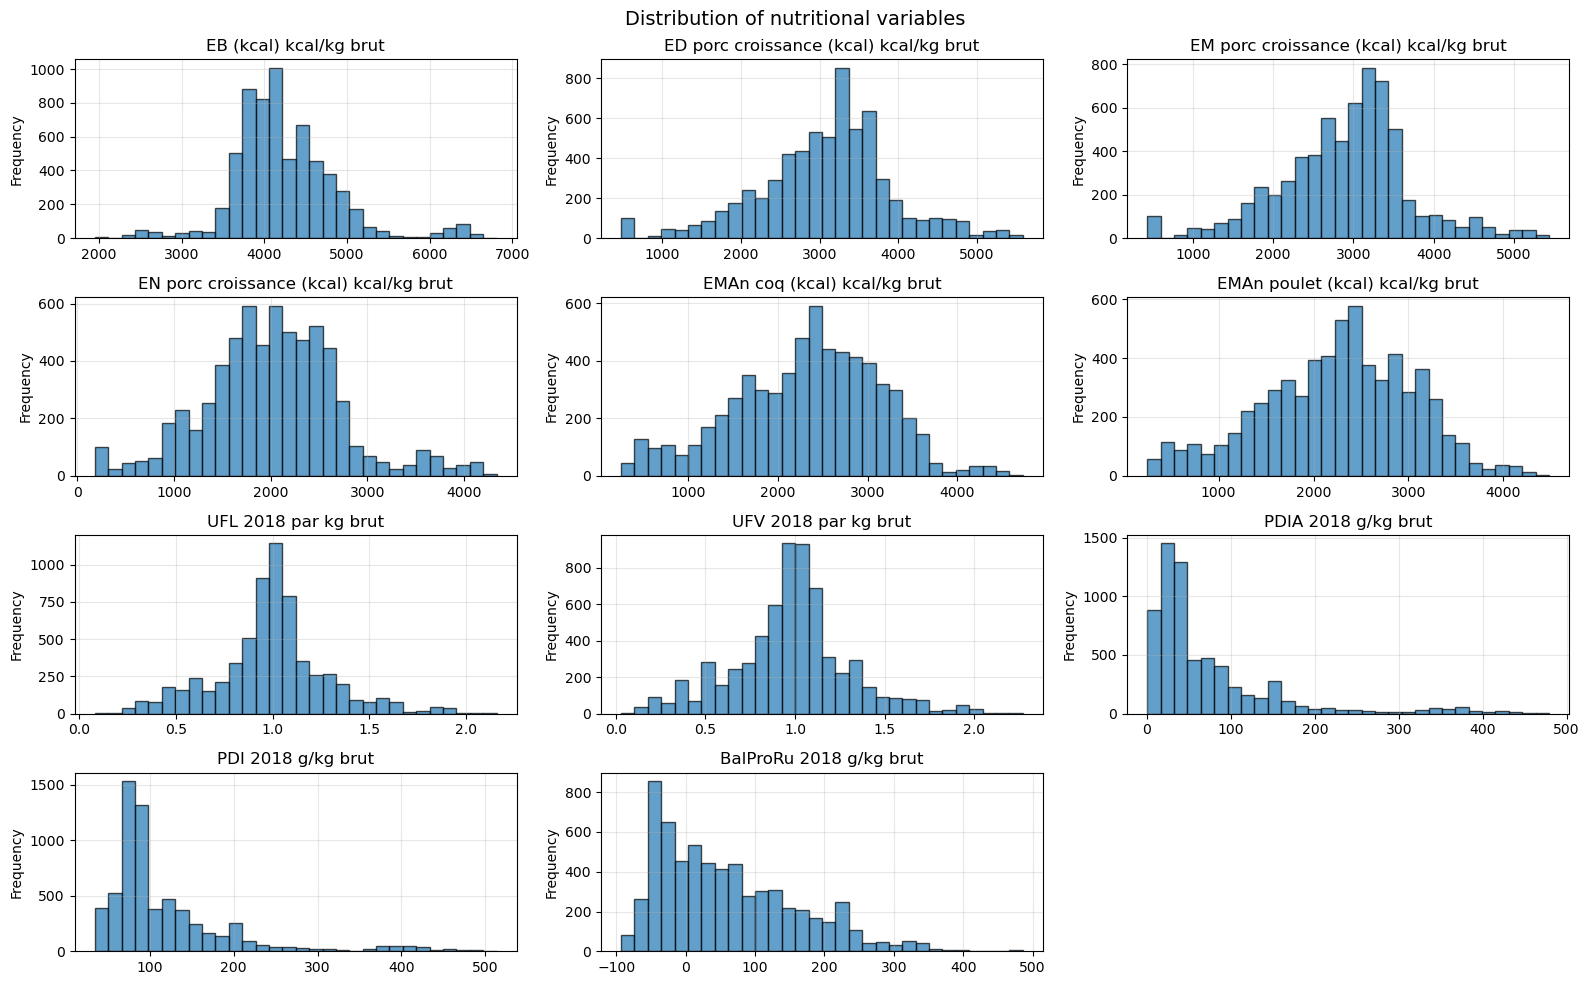

In [ ]:
# Distribution of chemical composition variables
print("\nDisplaying distributions for explanatory variables...")
fig = plot_distribution(data, vars_cibles, title="Distribution of nutritional variables")
plt.tight_layout()
plt.show()


Displaying distributions for explanatory variables...


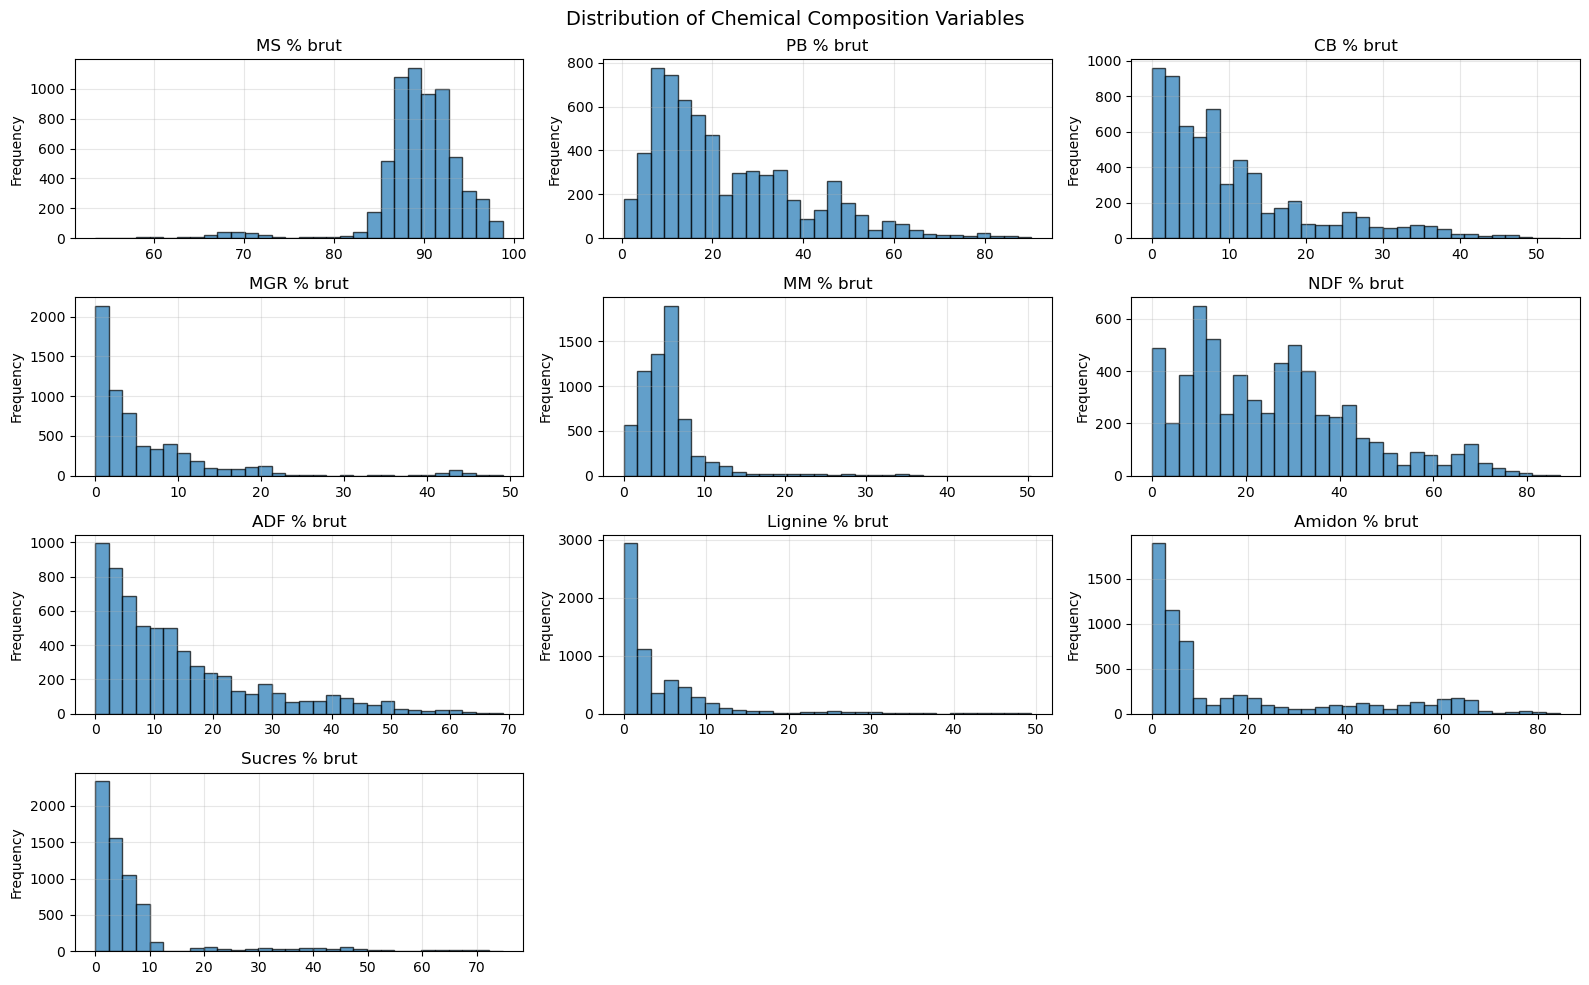

In [ ]:
# Distribution of chemical composition variables
print("\nDisplaying distributions for explanatory variables...")
fig = plot_distribution(data, vars_expl, title="Distribution of Chemical Composition Variables")
plt.tight_layout()
plt.show()

## Part 2: Correlation Analysis


Displaying correlation matrix for chemical composition...


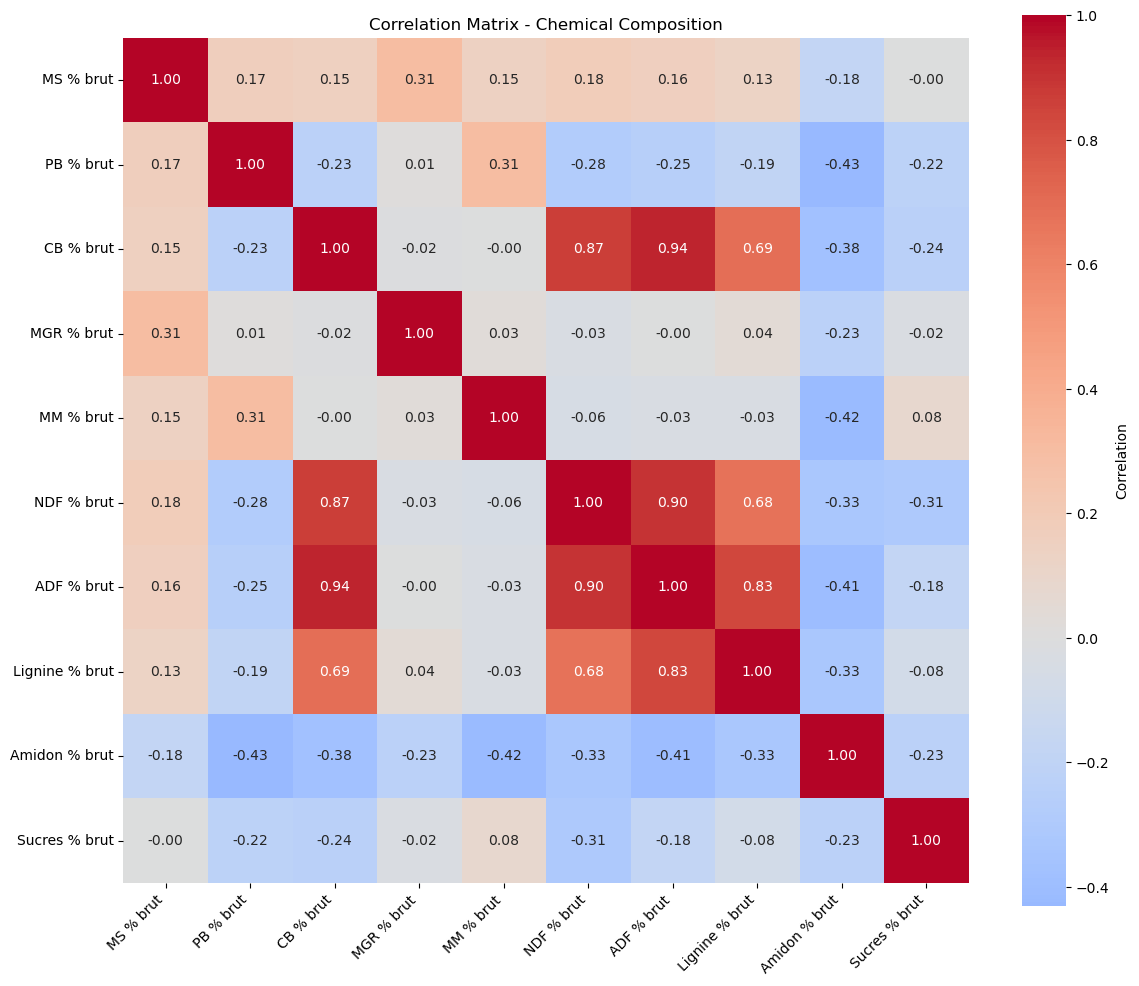


Displaying correlation matrix for composition + energy targets...


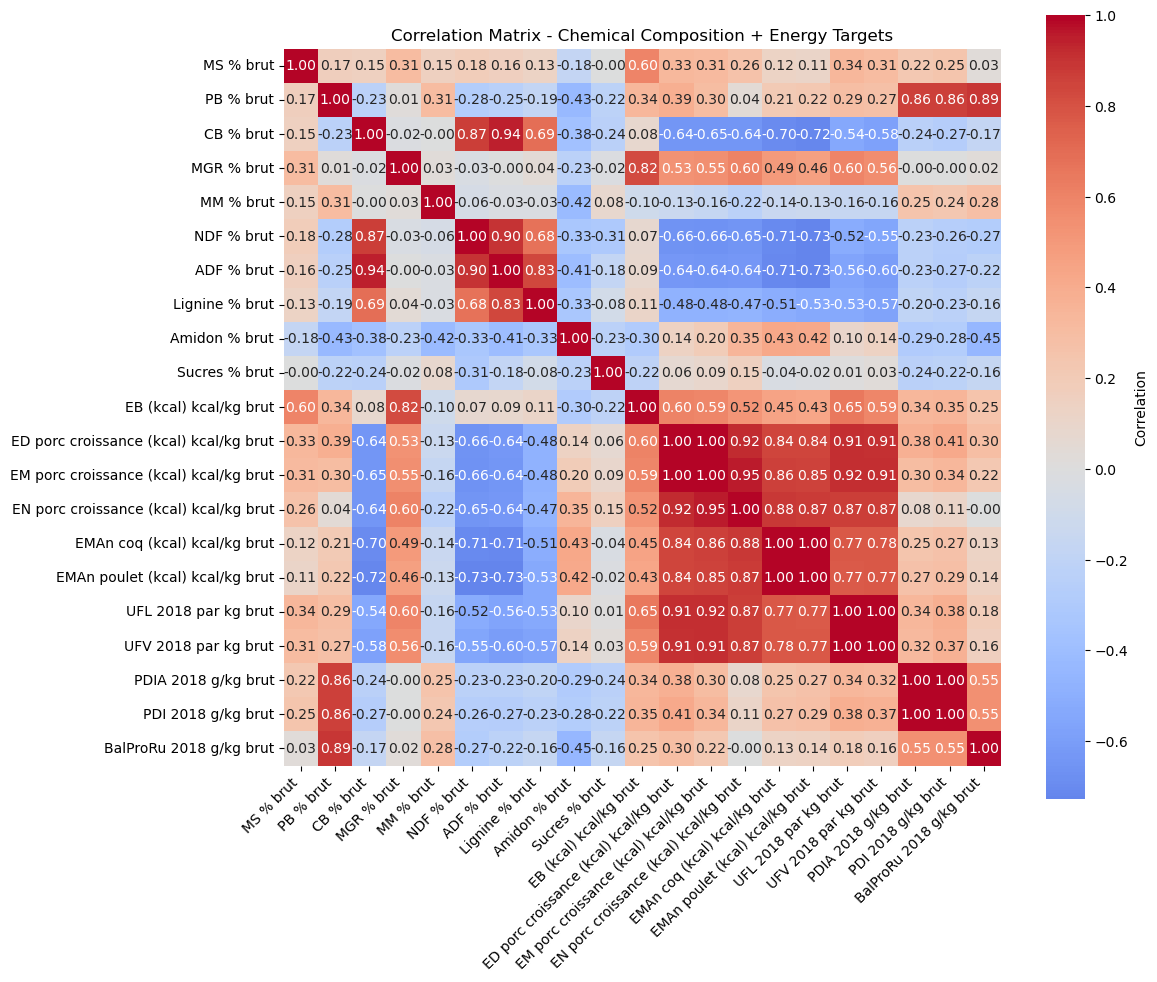

In [ ]:
# Correlation matrix - Chemical composition only
print("\nDisplaying correlation matrix for chemical composition...")
fig = plot_correlation_matrix(data[vars_expl], title="Correlation Matrix - Chemical Composition")
plt.tight_layout()
plt.show()

# Correlation matrix - Composition + Targets
print("\nDisplaying correlation matrix for composition + energy targets...")
fig = plot_correlation_matrix(data[vars_expl + vars_cibles], 
                              title="Correlation Matrix - Chemical Composition + Energy Targets")
plt.tight_layout()
plt.show()

## Part 3: PCA Analysis (Principal Component Analysis)

In [ ]:
# PCA 3D visualization
print("\nDisplaying 3D PCA visualization (colored by Classe)...")
fig, pca = plot_acp_3d(data, vars_expl, hue_col='Classe', 
                       title="3D PCA - Chemical Composition (Colored by Classe)")
fig.show()

print("\n✓ 3D PCA shows the distribution of products in the first 3 principal components")


Displaying 3D PCA visualization (colored by Classe)...



✓ 3D PCA shows the distribution of products in the first 3 principal components



Displaying variance explained...


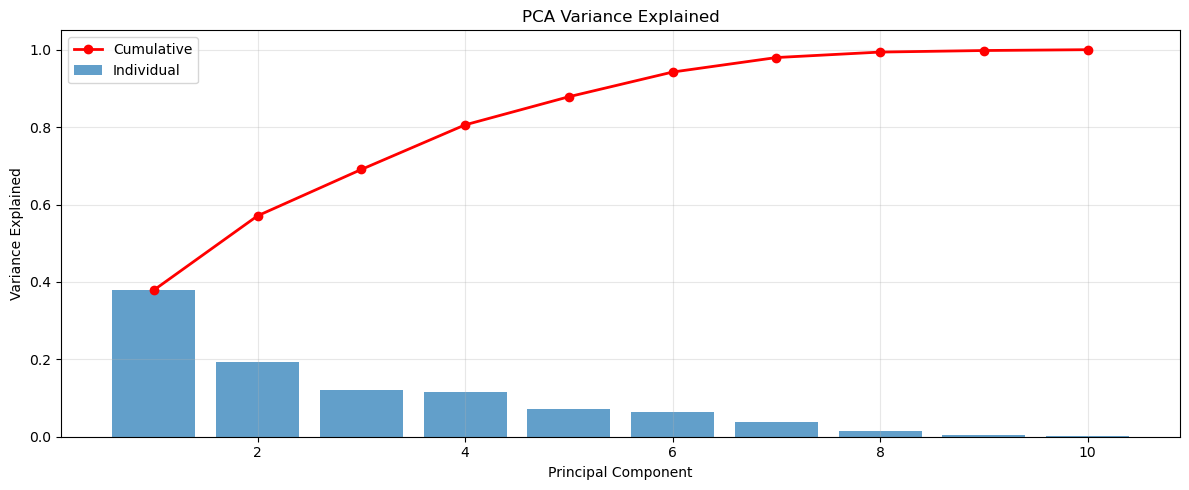


✓ Variance explained shows the cumulative contribution of each principal component


In [ ]:
# Variance explained by each principal component
print("\nDisplaying variance explained...")
fig = plot_variance_explained(data, vars_expl)
plt.show()

print("\n✓ Variance explained shows the cumulative contribution of each principal component")


Displaying PCA correlation circle (cercle de corrélation)...


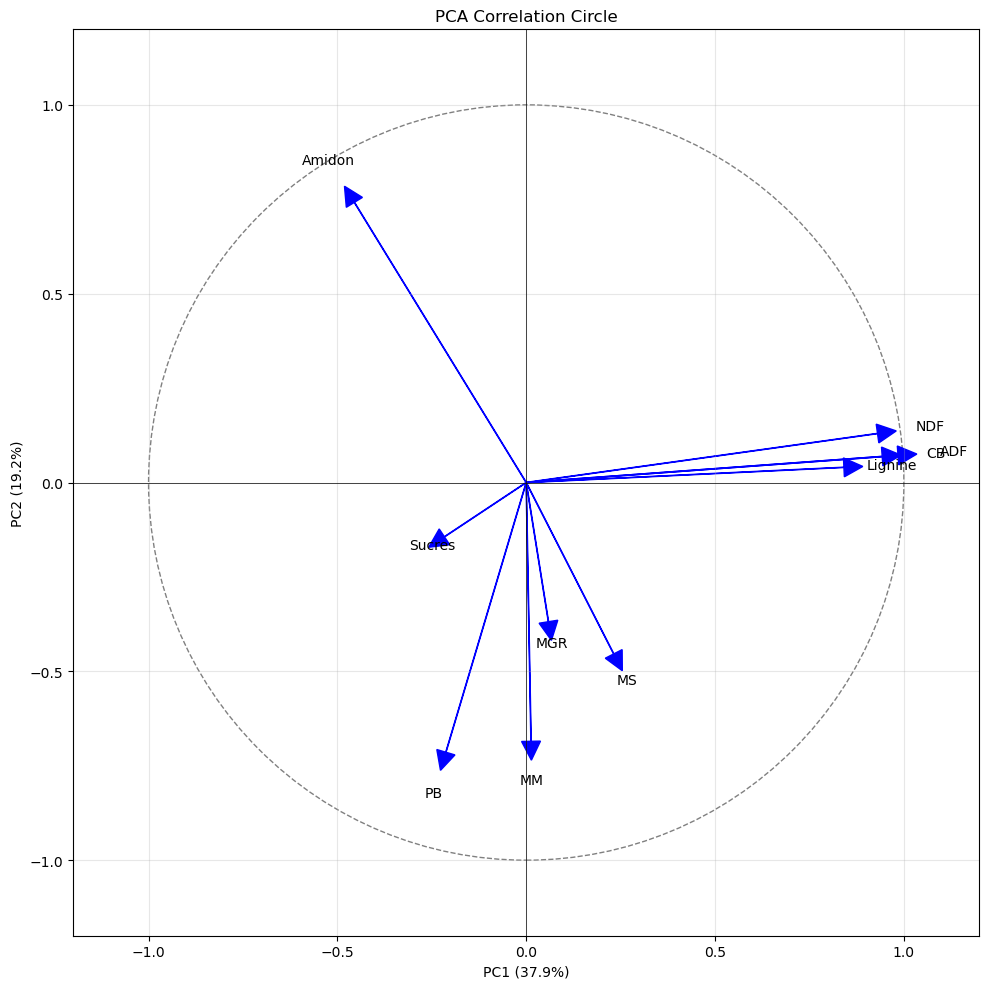


✓ Correlation circle shows the relationship between variables and principal components


In [ ]:
# Correlation circle (Cercle de corrélation)
print("\nDisplaying PCA correlation circle (cercle de corrélation)...")
fig = plot_correlation_circle(data, vars_expl, simplified_names)
plt.show()

print("\n✓ Correlation circle shows the relationship between variables and principal components")


Displaying PCA correlation circle (cercle de corrélation)...


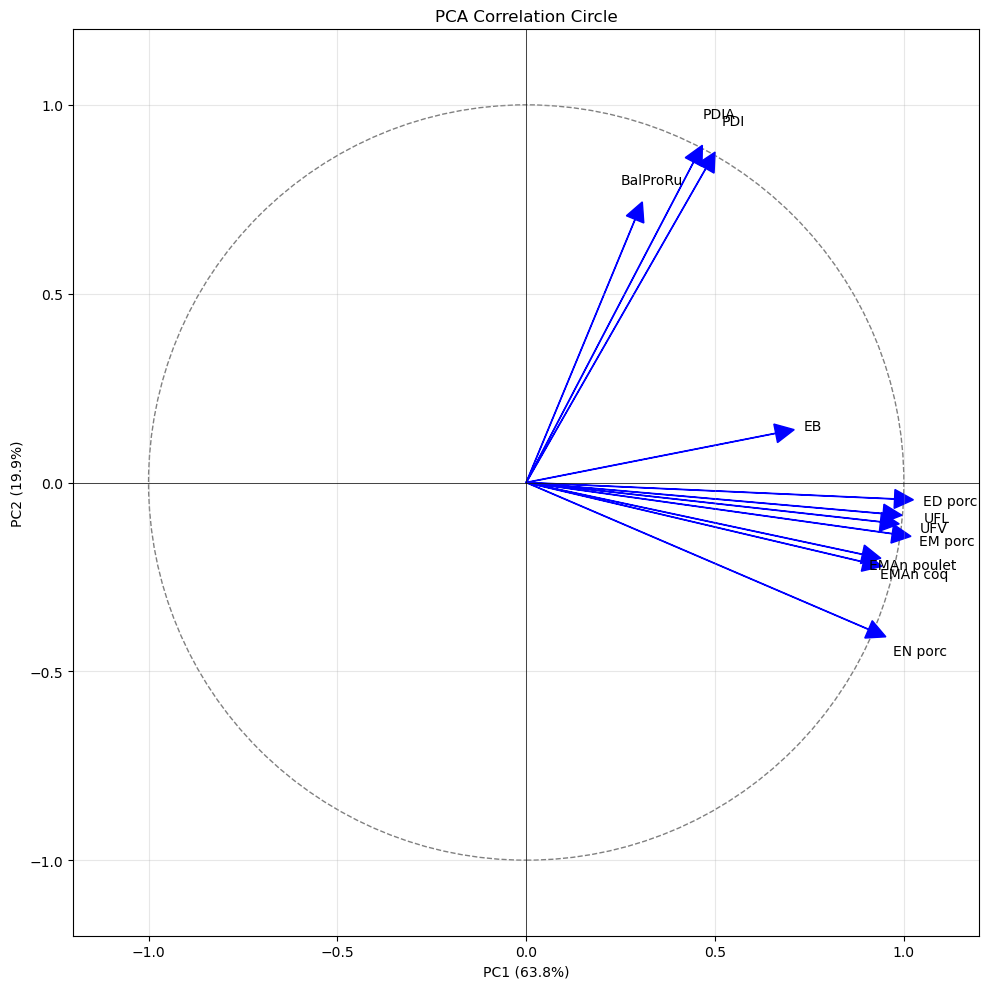


✓ Correlation circle shows the relationship between variables and principal components


In [ ]:
# Correlation circle (Cercle de corrélation)
print("\nDisplaying PCA correlation circle (cercle de corrélation)...")
fig = plot_correlation_circle(data, vars_cibles, simplified_names)
plt.show()

print("\n✓ Correlation circle shows the relationship between variables and principal components")